# 1 Preprocessing

## 1.1 Import the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import *
from IPython.core.display import display, HTML

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve
import warnings; warnings.simplefilter('ignore')

/var/folders/_w/3lzg7rfx71qbx9wnknyjvvyw0000gn/T/ipykernel_52207/1132271417.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


## 1.2 Importing the Data Set

In [2]:
df_adult_eda = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",
                           names = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain", "capital-lose", "hours-per-week", "native-country", "class"])
df_adult_eda.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-lose,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# 2 Data Investigation

## 2.1 Basic Check

In [3]:
df_adult_eda.describe()

,age,fnlwgt,education-num,capital-gain,capital-lose,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [4]:
df_adult_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-lose    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  class           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## 2.2 Null Value Check

In [5]:
# checking missing values

df_adult_eda.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-lose      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [6]:
# checking whether there are ? present in the dataset instead of Nan:

df_adult_eda.isin([' ?']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-lose         0
hours-per-week       0
native-country     583
class                0
dtype: int64

## 2.3 Unique Value Check 

In [7]:
df_adult_eda.nunique()

age                  73
workclass             9
fnlwgt            21648
education            16
education-num        16
marital-status        7
occupation           15
relationship          6
race                  5
sex                   2
capital-gain        119
capital-lose         92
hours-per-week       94
native-country       42
class                 2
dtype: int64

In [8]:
df_adult_eda.loc[: , ['education' , 'education-num']].value_counts()

education      education-num
 HS-grad       9                10501
 Some-college  10                7291
 Bachelors     13                5355
 Masters       14                1723
 Assoc-voc     11                1382
 11th          7                 1175
 Assoc-acdm    12                1067
 10th          6                  933
 7th-8th       4                  646
 Prof-school   15                 576
 9th           5                  514
 12th          8                  433
 Doctorate     16                 413
 5th-6th       3                  333
 1st-4th       2                  168
 Preschool     1                   51
dtype: int64

array([[<AxesSubplot: title={'center': 'age'}>,
        <AxesSubplot: title={'center': 'fnlwgt'}>],
       [<AxesSubplot: title={'center': 'education-num'}>,
        <AxesSubplot: title={'center': 'capital-gain'}>],
       [<AxesSubplot: title={'center': 'capital-lose'}>,
        <AxesSubplot: title={'center': 'hours-per-week'}>]], dtype=object)

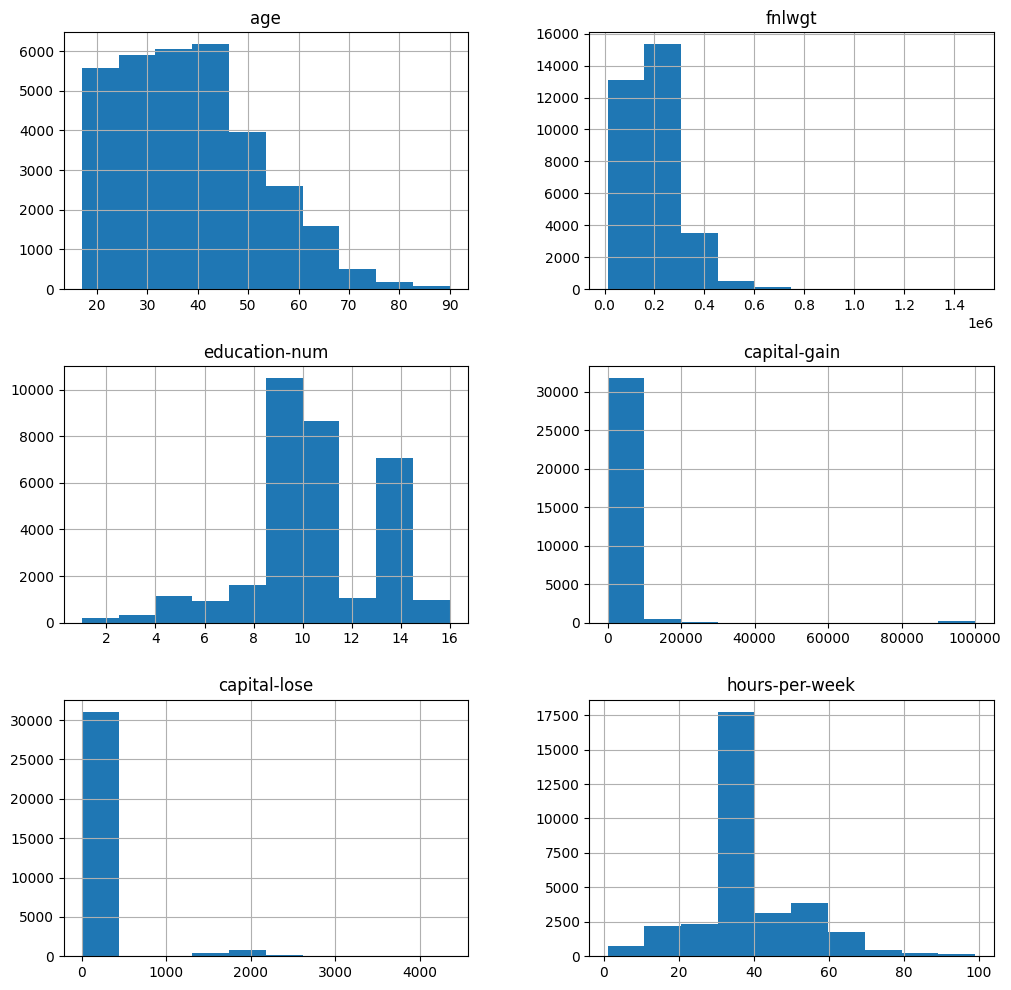

In [9]:
#Visualizing the numerical features of the dataset using histograms to analyze the distribution of those features in the dataset
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 12
df_adult_eda[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-lose', 'hours-per-week']].hist()

# 3 Feature Engineering

## 3.1 Drop Encoded Columns

In [10]:
df_adult_eda.drop('education' , axis = 1 , inplace = True) # education already encoded

## 3.2 Replace Missing Values

In [11]:
df_adult_eda = df_adult_eda.replace(' ?' , np.NaN)

In [12]:
df_adult_eda.isin([' ?']).sum()

age               0
workclass         0
fnlwgt            0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-lose      0
hours-per-week    0
native-country    0
class             0
dtype: int64

In [13]:
df_adult_eda = df_adult_eda.dropna(axis=0,how='any') #drop all rows that have any NaN values

In [14]:
df_adult_eda

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-lose,hours-per-week,native-country,class
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## 3.3 Encoding

In [15]:
# checking for norminal features

df_adult_eda['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object)

In [16]:
df_adult_eda['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [17]:
df_adult_eda['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [18]:
binary_features = ['sex', 'class']
nominal_features = ['workclass' ,'marital-status' , 'relationship' , 'race' ,'native-country' , 'occupation']
ordinal_features = [] # already dropped education so no features here

In [19]:
def binary_encode(df, columns):
    df = df.copy()
    encoder = LabelEncoder()
    for column in columns:
        df[column] = encoder.fit_transform(df[column])
    return df

In [20]:
def one_hot_encode(df, columns):
    df = df.copy()
    for column in columns:
        dummies = pd.get_dummies(df[column])
        df = pd.concat([df , dummies] , axis = 1)
        df.drop(column , axis = 1 , inplace = True)
    return df

In [21]:
from sklearn.preprocessing import LabelEncoder

df_adult_eda = binary_encode(df_adult_eda , binary_features)
df_adult_eda = one_hot_encode(df_adult_eda , nominal_features)

In [22]:
df_adult_eda

,age,fnlwgt,education-num,sex,capital-gain,capital-lose,hours-per-week,class,Federal-gov,Local-gov,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,39,77516,13,1,2174,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,50,83311,13,1,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,38,215646,9,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,53,234721,7,1,0,0,40,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,28,338409,13,0,0,0,40,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,0,38,0,0,0,...,0,0,0,0,0,0,0,0,1,0
32557,40,154374,9,1,0,0,40,1,0,0,...,0,0,1,0,0,0,0,0,0,0
32558,58,151910,9,0,0,0,40,0,0,0,...,0,0,0,0,0,0,0,0,0,0
32559,22,201490,9,1,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 3.4 Create Folds

In [23]:
from sklearn.model_selection import StratifiedKFold

def create_stratified_folds(data, no_of_splits, target_column):
    skf = StratifiedKFold(n_splits=no_of_splits, shuffle=True, random_state=42)
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    folds = []
    for train_index, test_index in skf.split(X, y):
        train_data = data.iloc[train_index]
        test_data = data.iloc[test_index]
        folds.append((train_data, test_data))
    return folds

# 4 Model Training

## 4.1 Data Split

In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and labels (y)
X = df_adult_eda.drop('class', axis=1)
y = df_adult_eda['class']

# Split the dataset into train and test sets using a 70:30 split ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## 4.2 Apply MinMaxScaler

In [25]:
from sklearn.preprocessing import MinMaxScaler

# scaling the data

scaler = MinMaxScaler()

X = pd.DataFrame(scaler.fit_transform(X) , columns = X.columns)
X

,age,fnlwgt,education-num,sex,capital-gain,capital-lose,hours-per-week,Federal-gov,Local-gov,Private,...,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0.301370,0.043338,0.800000,1.0,0.021740,0.0,0.397959,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.452055,0.047277,0.800000,1.0,0.000000,0.0,0.122449,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.287671,0.137244,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.493151,0.150212,0.400000,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.150685,0.220703,0.800000,0.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30157,0.136986,0.165563,0.733333,0.0,0.000000,0.0,0.377551,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
30158,0.315068,0.095589,0.533333,1.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30159,0.561644,0.093914,0.533333,0.0,0.000000,0.0,0.397959,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30160,0.068493,0.127620,0.533333,1.0,0.000000,0.0,0.193878,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# plot('age')

In [27]:
# plot('fnlwgt')

In [28]:
# plot('education-num')

In [29]:
# plot('sex')

In [30]:
# plot('capital-gain')

In [31]:
# plot('hours-per-week')

## 4.3 Model 1 - KNN

In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import time

# Create a KNeighborsClassifier object
knn = KNeighborsClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}
# param_grid = {
#     'n_neighbors': [11],
#     'weights': ['uniform'],
#     'algorithm': ['auto'],
#     'p': [1]
# }

# Train the KNN model and calculate the running time
start_time = time.time()

# Perform a grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

end_time = time.time()
running_time = end_time - start_time
print(f"KNN model training time: {running_time:.4f} seconds")

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Create a new KNeighborsClassifier object with the best hyperparameters
knn_best = KNeighborsClassifier(**grid_search.best_params_)

# Train the classifier on the training set
knn_best.fit(X_train, y_train)

# Test the classifier on the test set
y_pred_knn = knn_best.predict(X_test)


KNN model training time: 703.3643 seconds
Best hyperparameters: {'algorithm': 'auto', 'n_neighbors': 11, 'p': 1, 'weights': 'uniform'}
Best accuracy score: 0.7889448423304606


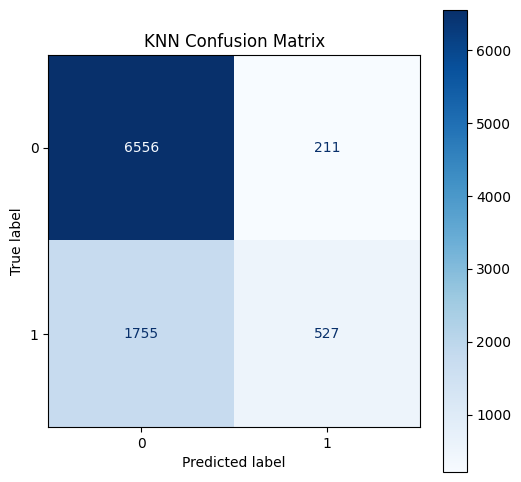

In [33]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_knn)
disp.plot(cmap='Blues', ax = ax)
plt.title('KNN Confusion Matrix')

# Show the plot
plt.show()

In [34]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      6767
           1       0.71      0.23      0.35      2282

    accuracy                           0.78      9049
   macro avg       0.75      0.60      0.61      9049
weighted avg       0.77      0.78      0.74      9049



## 4.3 Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

df1=create_stratified_folds(df_adult_eda,5,'class')

# Create a RandomForestClassifier object
rfc = RandomForestClassifier()

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [10, 50, 100, 200, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 20, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# param_grid = {
#     'n_estimators': [100],
#     'criterion': ['entropy'],
#     'max_depth': [None],
#     'min_samples_split': [10],
#     'min_samples_leaf': [2]
# }

# Train the KNN model and calculate the running time
start_time = time.time()

# Perform a grid search to find the best combination of hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

end_time = time.time()
running_time = end_time - start_time
print(f"RF model training time: {running_time:.4f} seconds")

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Best accuracy score:", grid_search.best_score_)

# Create a new RandomForestClassifier object with the best hyperparameters
rfc_best = RandomForestClassifier(**grid_search.best_params_)

# Train the classifier on the training set
rfc_best.fit(X_train, y_train)

# Test the classifier on the test set
y_pred_rf = rfc_best.predict(X_test)

RF model training time: 4566.9196 seconds
Best hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 500}
Best accuracy score: 0.8616488981803535


In [43]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6767
           1       0.78      0.63      0.70      2282

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

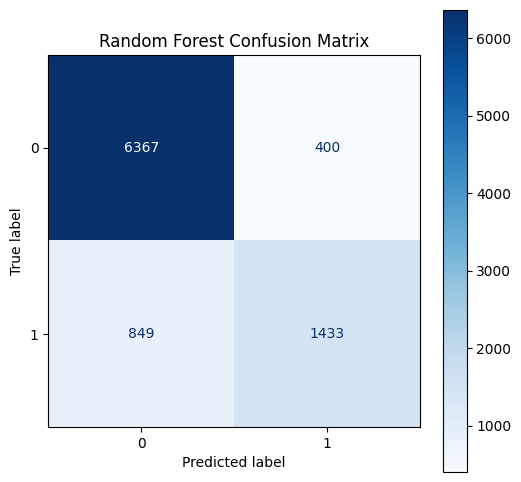

In [44]:
# Calculate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
disp = ConfusionMatrixDisplay(confusion_matrix = cm_rf)
disp.plot(cmap='Blues', ax = ax)
plt.title('Random Forest Confusion Matrix')

In [45]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91      6767
           1       0.78      0.63      0.70      2282

    accuracy                           0.86      9049
   macro avg       0.83      0.78      0.80      9049
weighted avg       0.86      0.86      0.86      9049



# 5 Model Comparison

## 5.1 ROC Curve

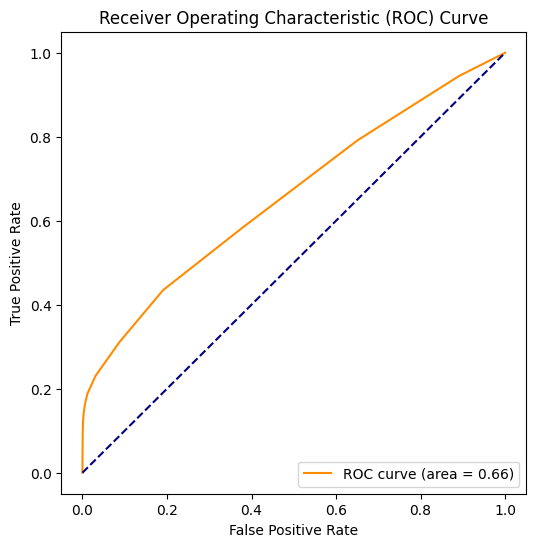

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for the test data
y_prob_knn = knn_best.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_prob_knn)

# Calculate the area under the ROC curve
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot the ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr_knn, tpr_knn, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

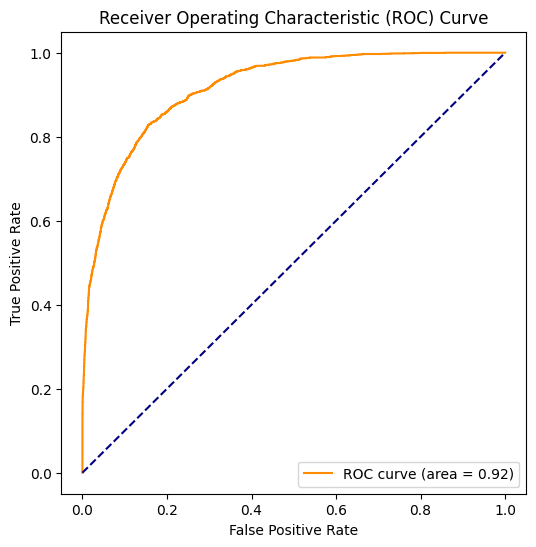

In [47]:
# Predict probabilities for the test data
y_prob_rf = rfc_best.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr_rf, tpr_rf, thresholds = roc_curve(y_test, y_prob_rf)

# Calculate the area under the ROC curve
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr_rf, tpr_rf, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

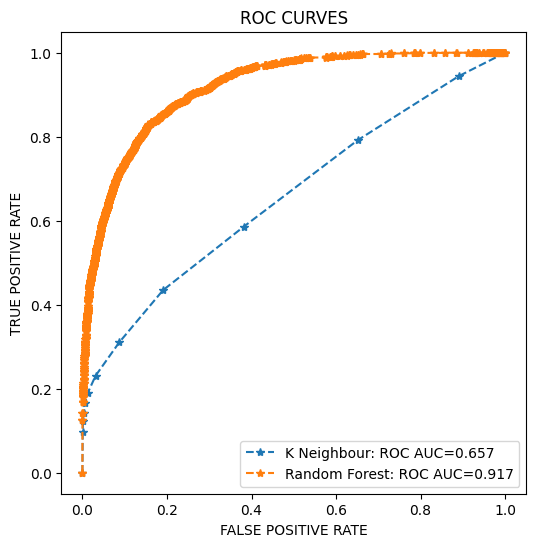

In [48]:
plt.figure(figsize=(6,6))
plt.plot(fpr_knn, tpr_knn, linestyle='--',marker='*',label='K Neighbour: ROC AUC=%.3f' % (roc_auc_knn))
plt.plot(fpr_rf, tpr_rf, linestyle='--',marker='*',label='Random Forest: ROC AUC=%.3f' % (roc_auc_rf))
# axis labels
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('ROC CURVES')
# show the legend
plt.legend()
# show the plot
plt.show()